Temperature (°C)
https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalLandTemperaturesByCountry.csv

Topic
https://data.worldbank.org/topic/climate-change

CO2 (kt)
https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

Forest (km2)
https://data.worldbank.org/indicator/AG.LND.FRST.K2

Agricultura (km2)
https://data.worldbank.org/indicator/AG.LND.AGRI.K2

Population (7mM)
https://data.worldbank.org/indicator/SP.POP.TOTL

Electric power consumption (kWh per capita)
https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC

In [1]:
!pip install --upgrade pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
API_19_DS2_en_csv_v2_3358246.csv
API_AG.LND.AGRI.K2_DS2_en_csv_v2_3359778.csv
API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_3362162.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3362284.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3358949.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv
API_SP.POP.TOTL_DS2_en_csv_v2_3358390.csv
API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv
covid_19_data.csv
flights.db
GlobalLandTemperaturesByCity.csv
GlobalLandTemperaturesByCountry.csv
london_merged.csv
Metadata_Country_API_19_DS2_en_csv_v2_3358246.csv
Metadata_Country_API_AG.LND.AGRI.K2_DS2_en_csv_v2_3359778.csv
Metadata_Country_API_AG.LND.FRST.K2_DS2_en_csv_v2_3362162.csv
Metadata_Country_API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3362284.csv
Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3358949.csv
Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3358390.csv
Met

In [4]:
import pandas as pd
import numpy as np

### INICIANDO UNA RUTINA TÍPICA DE MANEJO DE DATOS

Nuestro dataframe tiene 4 columnas

`dt -> Fecha en la que fue medida esa temperatura`

`AverageTemperature -> Temperatura promedio`

`AverageTemperatureUncertainty	-> Incertidumbre de temperatura media`

`Country -> Nombre de paises`




In [5]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


El tamaño de nuestra base de datos:

In [6]:
 df_temp.shape # filas, columnas

(577462, 4)

Como está compuesta nuestra base de datos:

2 variables tipo númerico, una de tipo objeto y otra tipo string



In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Ver los diversos paises que tengo en la base de datos, tambien hace referencia a continentes

In [8]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

Mejoramos el formato de nuestra base de datos

Convertimos la columna dt a una variable tipo tiempo

In [9]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

Podemos observar que la columna que antes tenia un formato tipo texto ahora tiene un formato tipo tiempo(fecha) 

Ahora creamos un filtro, quitando las fechas que sean mayores al año 1970

In [10]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


Agrupar por fecha y país, y encontrar un promedio anual para la temperatura

In [11]:
df_t_avg = df_temp.groupby(['Country', # Nuevo df  # Pongo lo que quiero agrupar
                 pd.Grouper(key='year', freq='1Y') # Para agupar por fecha (año y frecuencia= cada año)
]).agg({'AverageTemperature':[np.mean, np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

`.agg({'AverageTemperature':[np.mean, np.median]}):`

Agrego dos funciones estadisticas para promediar la columna AverageTemperature, creo un diccionario y dentro voy a crear una lista de funciones que quiero aplicar en esta columna 

Encontramos que por cada pais, para cada año, se ha calculado el promedio(`mean`) de temperatura y tambien la mediana(`median`)

**Si queremos ir a un país en particular**

`xs` -> Nos permite seleccionar algun tipo de pais en nuestro indice

Seguido de esto selecciono la columna principal AverageTemperature

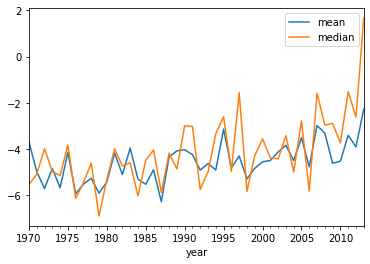

In [12]:
df_t_avg.xs('Russia')['AverageTemperature'].plot()

Obtenemos los valores de temperatura promedio y mediano para mexico, y con .plot() podemos visualizar esta temperatura

Es mejor trabajar con la mediana debido a que es un estimador estadistico que no sufre sesgos ante outliers(valores atípicos) 

Estoy construyendo un dataset mas compacto y facil para continuar nuestro analisis de datos

In [13]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


Creo una nueva columna que va a ser simplemente el año, para extraer un año y una fecha usamos la funcion de pandas dt

In [14]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

Para renombrar columnas:

In [15]:
df_t_med.rename(columns={'median':'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


`inplace=True`

Si quiero evitar escribir todo el tiempo df y df... , lo podemos hacer con esto

Si quiero explorar un poco la composicion de las temperaturas por pais puedo hacer un boxplot(es una herramienta muy util para encontrar la distribucion de las variables), lo hago con una tabla pivot

In [16]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,11.1180,28.6180,8.6480,21.9360,6.3550,12.4300,25.6190,27.4460,25.5650,27.9370,27.0110,6.5360,10.6590,26.4620,27.0670,13.1690,21.9350,28.3010,10.0870,23.4400,25.4440,26.7220,11.5200,28.1070,25.7410,19.9750,27.1040,24.4220,-1.6320,24.7480,...,22.6690,1.2720,14.4880,13.7550,27.6430,28.3390,26.4830,-5.8620,19.2560,3.2700,7.4020,19.4770,24.2230,6.4740,22.3660,26.8520,26.8290,27.0600,23.6180,26.4450,20.1740,12.9030,17.4190,26.8910,22.8360,10.0670,28.9860,9.7340,9.9730,8.2860,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,8.6390,28.0850,8.1845,22.2985,7.1385,10.7060,25.4960,25.5135,25.3280,26.3180,26.4790,5.7755,10.0065,25.2630,26.9295,12.6415,21.2455,27.2900,10.1885,23.9550,24.9120,26.2470,9.5820,27.9310,24.7345,19.6260,27.0150,24.0725,-3.4755,23.6530,...,21.9110,1.5420,11.9565,12.6455,27.1535,27.9145,25.8920,-10.5280,19.5295,1.6720,8.5215,17.1220,22.1795,5.8390,22.3920,26.6300,26.4135,26.3805,23.8420,26.0095,19.6470,10.6395,14.9685,26.7755,22.7355,7.4325,27.8175,8.7785,8.9780,8.7545,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,11.4950,28.6780,8.6445,22.3470,5.3755,13.6880,25.8145,26.3535,26.0285,26.9035,27.0225,6.0925,8.7840,25.8145,26.7025,12.5800,21.9525,27.8050,9.7260,23.0225,25.1430,26.6150,10.6495,28.2305,25.4830,20.0425,27.2160,24.1850,-6.6775,23.6670,...,22.3110,0.4455,12.5585,12.2105,27.4820,28.9775,26.1590,-5.9665,19.9670,2.2865,6.1615,19.4300,23.0640,4.9110,22.6910,26.9205,26.2535,27.0445,23.2235,26.4690,18.6385,13.2440,16.3415,27.1115,23.2850,9.0295,28.0485,8.6235,8.7990,8.2290,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,9.7335,28.1630,8.5830,22.9775,4.5905,11.8825,25.5835,27.0690,25.9215,27.1555,26.8725,5.7910,8.0960,26.4840,27.3385,13.5435,22.4190,27.7220,9.3100,23.6135,25.2795,27.0685,10.5565,28.4860,25.4180,20.2410,27.4025,24.6665,-3.6645,24.5360,...,22.4800,1.6770,12.8265,12.3910,27.5945,28.6225,26.4350,-9.6135,18.8930,0.4795,5.1230,18.9260,23.2600,5.5885,22.7820,26.9290,27.0445,26.9310,23.9020,26.4575,19.6385,12.1315,15.8780,26.8120,23.0450,8.5070,28.7285,7.4480,7.5175,8.8785,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,9.3265,27.7935,8.3875,21.6105,5.1555,11.6075,25.2450,26.3585,25.4955,27.2765,26.7885,6.1085,8.3310,25.6020,26.7790,14.0195,21.2395,27.3970,8.3580,22.0050,24.7665,26.1720,10.4035,27.0055,25.5345,19.8995,27.2265,24.0195,-6.0400,23.3540,...,21.8890,1.4885,12.2490,10.8630,27.2295,28.1990,25.8925,-7.0340,19.3190,2.4690,5.4260,19.1350,22.9360,5.6675,22.3410,26.7550,26.4965,26.4465,23.8720,26

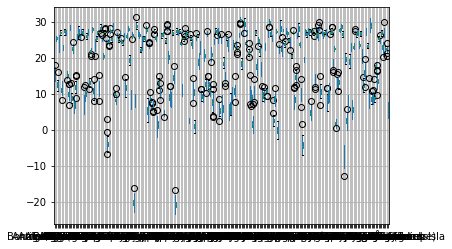

In [17]:
df_t_pivot.boxplot()

Cada uno de los puntos representa los valores atipicos de los boxplot de todos los paises

Como son muchos paises, selecciono una parte para hacer mejor visible el analisis

T -> Traspuesta, significa que va a volver mis columnas, indices y viseversa

sample -> Me selecciona filas aleatorias en un df 

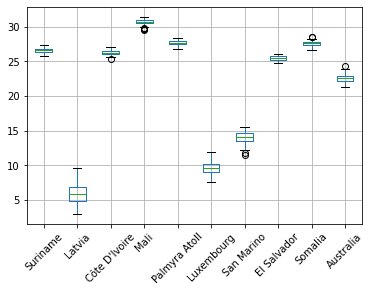

In [18]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)

boxplot(rot=45) -> Sirve para obtener un grafico mas organizado y que los paises no se sobrepongan (rotacion)

**En esta clase vimos como con un dataset desde cero a travez de un preprocesamiento y ordenamiento de las variables podiamos llegar a extraer insights (resultado del analisis de datos e información que ayudan a entender que está pasando en un contexto específico y generar estas acciones estratégicas) de nuestra base de datos, entendimos como ha variado la temperatura en los últimos años en cada país y también vimos, a travez de los boxplot como la temperatura difiere dependiendo del país en si.**

### **PREPROCESAMIENTO DE DATOS: TERMINANDO DE PREPARAR Y LIMPIAR LOS DATASETS**

Topic https://data.worldbank.org/topic/climate-change

CO2 (kt) https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

Forest (km2) https://data.worldbank.org/indicator/AG.LND.FRST.K2

Agricultura (km2) https://data.worldbank.org/indicator/AG.LND.AGRI.K2

Population (7mM) https://data.worldbank.org/indicator/SP.POP.TOTL

Electric power consumption (kWh per capita) https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC

`Topic ->` Topicos, series de diversas variables que estan super correlacionadas con los cambios climateológicos

`CO2(kt) ->` Cantidad de dioxido de carbono, unidad kilotones

`Forest(km2) ->` Cantidad de bosques deforestados por kilomentro cuadrado

`Agricultura(km2) ->` Cantidad de agricultura en cada país por kilometro cuadrado

`Population(7mM) ->` Población de cada uno de esos paises

`Electric power consumption (kWh per capita) ->` Producción energetica por capita para cada país

In [19]:
ls

API_19_DS2_en_csv_v2_3358246.csv
API_AG.LND.AGRI.K2_DS2_en_csv_v2_3359778.csv
API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_3362162.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3362284.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3358949.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv
API_SP.POP.TOTL_DS2_en_csv_v2_3358390.csv
API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv
covid_19_data.csv
flights.db
GlobalLandTemperaturesByCity.csv
GlobalLandTemperaturesByCountry.csv
london_merged.csv
Metadata_Country_API_19_DS2_en_csv_v2_3358246.csv
Metadata_Country_API_AG.LND.AGRI.K2_DS2_en_csv_v2_3359778.csv
Metadata_Country_API_AG.LND.FRST.K2_DS2_en_csv_v2_3362162.csv
Metadata_Country_API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3362284.csv
Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3358949.csv
Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3358390.csv
Metadata_Indicator_API_19_DS2_en_csv_v2_335824

Para leerlos, para cargar nuestro conjunto de datos a nuestra sesion de colab, usamos pd.read_csv(y el nombre de cada uno de nuestros archivos)

In [20]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header=2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header=2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header=2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header=2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header=2)

In [21]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.

Voy a seleccionar varias columnas para unificarla con el df de la clase anterior de la temperatura

In [22]:
range(1971,2015) # Esto genera una serie de elementos continuos de años(serie numérica)
map(str, range(1971,2015)) # Esto me genera una lista de elementos de años, pero ahora en formato tipo texto
cols = ['Country Name',	'Country Code'] + list(map(str, range(1971,2015))) # Aca escibo las columnas que quiero seleccionar
cols[:5] # Muestro los primeros 5 datos con los que estoy trabajando(Hasta el 2015)

['Country Name', 'Country Code', '1971', '1972', '1973']

In [23]:
list(map(str, range(1971,2015))) # Listo todos los años en formato tipo texto

['1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [24]:
df_agri.loc[:, cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
1,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,380490.0,380490.0,380530.0,380540.0,380540.0,380540.0,380540.0,380540.0,380450.0,380400.0,380400.0,380400.0,380300.0,380300.0,379340.0,378130.0,377530.0,377520.0,377900.0,378670.0,377530.0,377530.0,377530.0,377530.000000,379100.000000,379110.000000,379100.000000,379100.000000,379100.000000,379100.000000,379100.000000,379110.000000,379100.000000,379100.000000,379100.000000,379100.000000
2,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574040.0,574500.0,575000.0,575000.0,575000.0,575000.0,575000.0,575000.0,575000.0,574000.0,573000.0,573000.0,573900.000000,575900.000000,575900.000000,575900.000000,575900.000000,576900.000000,576900.000000,582900.000000,583900.000000,589900.000000,589900.000000,591900.000000,591900.000000
3,Albania,ALB,12000.0,11740.0,11460.0,11220.0,10800.0,10750.0,11090.0,11140.0,11170.0,11180.0,11160.0,11140.0,11100.0,11130.0,11120.0,11110.0,11110.0,11170.0,11100.0,11210.0,11270.0,11270.0,11260.0,11260.0,11270.0,11310.0,11350.0,11390.0,11450.0,11440.0,11390.0,11400.000000,11210.000000,11220.000000,10770.000000,11200.000000,11190.000000,11810.000000,12013.000488,12013.000488,12010.000000,12013.000488,11873.000488,11742.900391
4,Andorra,AND,250.0,250.0,240.0,240.0,240.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,227.5,228.500004,228.600006,228.099995,217.999992,217.800007,207.700005,207.600002,207.700005,197.700005,197.700005,187.600002,188.099995,188.099995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,234630.0,234630.0,234650.0,234650.0,234650.0,234650.0,234700.0,234700.0,234790.0,234790.0,234810.0,236260.0,236310.0,234810.0,237250.0,237300.0,237360.0,237550.0,237200.0,236800.0,236680.0,236690.0,235950.0,236560.000000,234950.000000,235570.000000,235230.000000,236270.000000,236270.000000,235170.000000,234520.000000,235790.000000,234520.000000,235500.000000,235460.000000,235460.000000
261,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,942100.0,941600.0,941000.0,940330.0,940330.0,940330.0,940330.0,944000.0,946500.0,949000.0,953000.0,956000.0,960050.0,964730.0,969360.0,972650.0,975200.0,978900.0,979450.0,979880.0,980580.0,981250.0,980130.0,980280.000000,979280.000000,976080.000000,974830.000000,968880.000000,968900.000000,971080.000000,969880.000000,968910.000000,963740.000000,968410.000000,968410.000000,968410.000000
262,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,197800.0,198460.0,198360.0,198080.0,199610.0,199820.0,201250.0,202250.0,203660.0,205290.0,208970.0,208110.0,208260.0,210650.0,212020.0,214730.0,214580.0,218650.0,219710.0,220250.0,224050.0,224980.0,225550.0,226160.000000,229090.000000,228970.000000,227620.000000,230480.000000,229840.000000

Para volver las columnas de años, parte de nuestro df como una serie, usamos la función .melt(dentro pongo las variables que quiero continuar conservando como serie)

In [25]:
df_agri.loc[:, cols].melt(id_vars=['Country Name',	'Country Code'])

,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


Todos los años que antes eran columnas ahora forman parte de una misma columna(serie) llamada variable

Lo que voy a hacer es renombrar algunas variables para que tengan el mismo formato del df de la clase anterior

In [26]:
df_agri.loc[:, cols].melt(id_vars=['Country Name',	'Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'agriculture'})

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


El proceso anterior debemos hacerlo para todas las otras variables en el df y la mejor forma es hacerlo con una Función.

In [27]:
def fun_format(df, col = 'agriculture'):
  return df.loc[:, cols].melt(id_vars=['Country Name',	'Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':col})

La ventaja de trabajar con los set de datos del  [wordbank](https://www.worldbank.org/en/home) es que todos tienen el mismo formato y podemos aplicar la misma función a todos los df

Aplicamos al df de agricultura esta función y la tranformamos en el mismo formato

In [28]:
df_agri = fun_format(df_agri, col = 'agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col = 'co2')
df_popu = fun_format(df_popu, col = 'population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11611,Kosovo,XKX,2014,1821800.0
11612,"Yemen, Rep.",YEM,2014,25823485.0
11613,South Africa,ZAF,2014,54545991.0
11614,Zambia,ZMB,2014,15399753.0


Obtenemos nuevos df con formatos mucho mas compactos y compatibles con el df de la clase anterior(df_t_med)

In [29]:
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


**Juntamos todos los df con `pd.merge`**

Creamos un df llamado merge

`Hay que cambiar las fechas(date) al formato tipo texto para que no haya errores`

`Con .info() podemos ver de que estan hechas cada variable`

In [30]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  object 
 3   population  11501 non-null  float64
dtypes: float64(1), object(3)
memory usage: 363.1+ KB


Si lo queremos cambiar usamos la funcion .astype(float) que lo que va a hacer es definir la variable date como flotante(decimal)

In [31]:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  float64
 3   population  11501 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.1+ KB


In [32]:
df_merge = pd.merge(df_t_med[['Country', 'temperature','date']],
                    df_popu, on = ['Country', 'date'], how = 'inner')
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475445.0
1,Afghanistan,13.8725,1972,AFG,11791215.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412950.0
4,Afghanistan,13.5130,1975,AFG,12689160.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0


Para hacerlo con todos:

Para evitar hacer el merge tantas veces realizo la siguiente funcion:

In [33]:
def fun_merge(df1,df2):
    return pd.merge(df1,df2,on=['Country','name','date'], how = 'inner') 

y luego simplemente la llamo

In [34]:
df_merge = fun_merge(df_merge,df_co2e)
df_merge = fun_merge(df_merge,df_elec)
df_merge = fun_merge(df_merge,df_agri)
df_merge = fun_merge(df_merge,df_fore)
df_merge

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.9340,1971,AFG,11475445.0,1895.839,NaN,380360.0,NaN
1,Afghanistan,13.8725,1972,AFG,11791215.0,1532.806,NaN,380460.0,NaN
2,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,380480.0,NaN
3,Afghanistan,13.6160,1974,AFG,12412950.0,1917.841,NaN,380480.0,NaN
4,Afghanistan,13.5130,1975,AFG,12689160.0,2126.860,NaN,380480.0,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7777.707,606.644199,162000.0,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9563.536,636.249337,164000.0,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7792.375,608.762505,162000.0,149992.001953


Para quitar los NaN del df:

In [35]:
df_climate = df_merge.dropna()
df_climate

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
62,Albania,13.4490,1990,ALB,3286542.0,5515.168,552.252185,11210.0,7887.999878
63,Albania,11.5885,1991,ALB,3266790.0,4286.723,418.453589,11270.0,7868.499756
64,Albania,13.5850,1992,ALB,3247039.0,2515.562,453.644074,11270.0,7849.000244
65,Albania,13.6500,1993,ALB,3227287.0,2335.879,536.363825,11260.0,7829.500122
66,Albania,13.2390,1994,ALB,3207536.0,1925.175,596.407959,11260.0,7810.000000
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,5603.176,585.456912,163000.0,159510.000000
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,7777.707,606.644199,162000.0,156240.000000
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,9563.536,636.249337,164000.0,153115.996094
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,7792.375,608.762505,162000.0,149992.001953


### **ANALISIS DE DATOS**

¿Cuales son los 10 paises que mas co2 producen?

Hacemos un agrupamiento por país(groupby) y extraemos la variable co2, elijo la mediana para evitar sesgos estadisticos causados por valores atípicos y también ordeno los valores de manera descendiente con sort_values


In [36]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America    5.886300e+06
United States    5.382124e+06
China            3.668918e+06
Japan            1.202083e+06
India            1.047706e+06
                     ...     
Haiti            1.651984e+03
Mozambique       1.584144e+03
Togo             1.285284e+03
Niger            7.847380e+02
Eritrea          6.142225e+02
Name: co2, Length: 120, dtype: float64

Para sacar la notación cientifica

In [37]:
pd.set_option('display.float_format', '{:,.1f}'.format)

Si volvemos a correr la linea de codigo anterior:

In [38]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

Si quiero realizar un Scatterplot con pandas, lo voy a realizar seleccionando solo los diez paises que mas co2 producen y lo hago con .head(10), además con  .index para listarlos

In [39]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

Uso first_10 como filtro, para generar un nuevo df que contiene menos información:

In [40]:
df_max_co2 = df_climate[df_climate['Country'].isin(['United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","677,680.0","3,482,730.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","677,530.0","3,482,259.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","678,140.0","3,481,788.1"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","678,740.0","3,481,316.9"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","679,340.0","3,480,845.9"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,099,606.9","3,079,274.1"
7005,United States,10.2,2010,USA,"309,326,085.0","5,395,532.1","13,394.9","4,084,261.9","3,087,200.0"
7006,United States,9.5,2011,USA,"311,580,009.0","5,289,680.5","13,246.0","4,046,693.1","3,089,950.0"
7007,United States,9.9,2012,USA,"313,874,218.0","5,119,436.4","12,964.3","4,087,065.0","3,092,700.0"


Con nuestro df anterior construimos el Scatterplot:

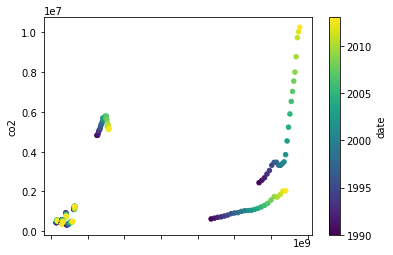

In [41]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis'
)

`Las gráficas son elementos muy poderosos para hacer analisis y comprender la información que tenemos en nuestro dataset`

¿Qué pasa si correlacionamos estas variables entre ellas mismas?

In [42]:
df_climate.corr() # corr nos calcula la correlación entre las variables de nuestro df

,temperature,date,population,co2,electricprod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.0,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.0,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


Numéricamente es dificil interpretar estos datos, entonces es recomendable usar librerias de gráficas

In [43]:
import seaborn as sns

Obtenemos la misma matriz anterior, pero ahora con colores en una gráfica

annot=True -> Me permite ver los valores en cada una de esas matrices

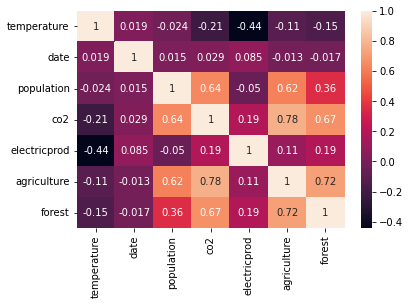

In [44]:
sns.heatmap(df_climate.corr(), annot=True)

Vamos a eliminar la variable país y analizar todos los datos como un sólo planeta

In [45]:
df_med = df_climate.groupby('date').median()
df_med

,temperature,population,co2,electricprod,agriculture,forest
date,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","90,195.0","54,005.0"
1991,22.4,"10,346,663.5","27,343.0","1,072.5","91,870.0","60,307.5"
1992,19.9,"9,188,305.5","26,420.7","1,451.8","89,700.0","45,621.0"
1993,20.6,"9,951,683.5","28,267.1","1,520.3","89,890.0","44,579.0"
1994,20.7,"9,991,525.0","29,640.4","1,576.8","89,150.0","42,572.0"
1995,20.1,"10,026,176.0","29,090.3","1,578.3","81,080.0","41,640.0"
1996,20.2,"10,063,945.0","30,670.8","1,687.1","79,870.0","41,270.0"
1997,20.4,"10,108,977.0","30,623.1","1,762.4","80,120.0","41,270.0"
1998,21.5,"10,069,000.0","31,675.5","1,807.3","80,550.0","40,834.0"


Repetimos lo mismo con el nuevo df, reseteamos el indice para que nuestra temperatura tambien sea parte del analisis de correlaciones (en la grafica anterior se saco la temperatura)



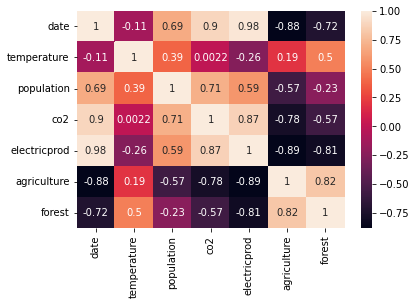

In [46]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

Una forma diferente de ver este tipo de correlaciones es a travez de matrices de dispercion(scatter_matrix)

Pandas tambien cuenta con funciones dentro de su libreria para realizar analisis mediante graficas

In [47]:
from pandas.plotting import scatter_matrix

figsize -> Para agrandar el tamaño de la grafica

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3705b0a50>,
      dtype=object)

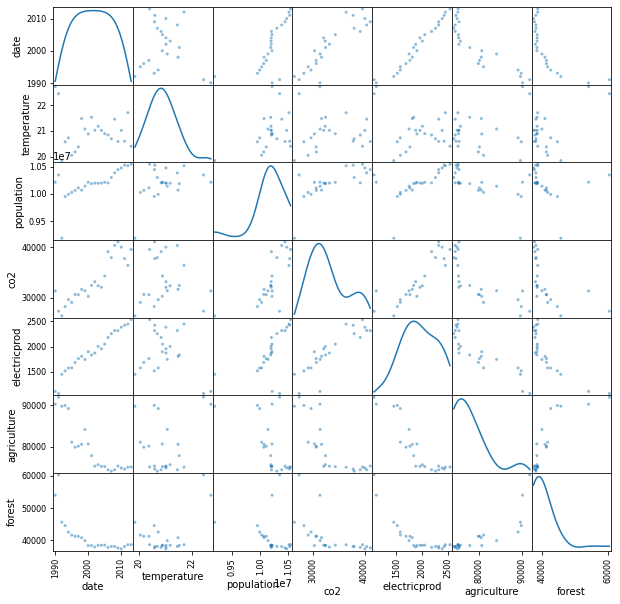

In [48]:
scatter_matrix(df_med.reset_index(), diagonal='kde', figsize=(10,10))

Otra herramienta muy útil para analizar mis datos son los gráficos de coordenadas paralelas(parallel_coordinates)

In [49]:
from pandas.plotting import parallel_coordinates

Necesitamos un df más compacto, entonces creamos un df que tenga paises de sur américa

In [50]:
df_suramerica = df_climate[
df_climate['Country'].isin(['Colombia',
     'Argentina',
     'Bolivia',
     'Mexico',
     'Peru',
     'Chile'])                           
][['Country',
 'temperature',
 'co2',
 'agriculture',
 'forest']]

colormap -> Para cambiar los colores que son dificiles de diferenciar: Accent, jet

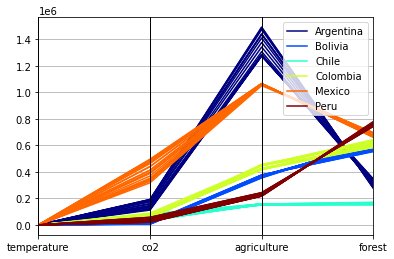

In [51]:
parallel_coordinates(df_suramerica, 'Country', colormap='jet')

En éste modulo vimos como aplicar todas las diversas herramientas de la libreria de pandas para el analisis de datos, desde la parte de preprocesamiento, unificacion de base de datos, hasta la parte de analisis con gráficas.

In [52]:
df = pd.DataFrame({
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}, index = ['Ana','Benito','Camilo','Daniel','Erika','Paola','Gabriela'])

print(df.iloc[[4],[2]])

      pais
Erika   mx


In [53]:
df = pd.DataFrame({
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}, index = ['Ana','Benito','Camilo','Daniel','Erika','Paola','Gabriela'])


print(df.loc[['Ana'],['cm']])

      cm
Ana  115


In [54]:
pd.NA | False

<NA>

In [55]:
np.array([10,8,5,0]) * np.array([0,1,6,12])

array([ 0,  8, 30,  0])

In [56]:
df = pd.DataFrame({
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}, index = ['Ana','Benito','Camilo','Daniel','Erika','Paola','Gabriela'])


print(df.query("(edad >= 12) & (cm < 130) & (Q1 > 5)")['Q2'])

Erika   8.0
Name: Q2, dtype: float64


In [57]:
df = pd.DataFrame({
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}, index = ['Ana','Benito','Camilo','Daniel','Erika','Paola','Gabriela'])


print(df['edad'] >= 12)

Ana         False
Benito      False
Camilo       True
Daniel       True
Erika        True
Paola       False
Gabriela     True
Name: edad, dtype: bool


In [58]:
df = pd.DataFrame({
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}, index = ['Ana','Benito','Camilo','Daniel','Erika','Paola','Gabriela'])


print(df.query("(edad >= 12) & (cm < 130) & (Q1 > 5)")['Q2'])

Erika   8.0
Name: Q2, dtype: float64


In [59]:
np.array([10,8,5,0]) * np.array([0,1,6,12])

array([ 0,  8, 30,  0])

In [60]:
df = pd.DataFrame({
    'edad' :     [ 10, 9, 13, 14, 12, 11, 12],
    'cm' : [ 115, 110, 130, 155, 125, 120, 125],
    'pais' :    [ 'co', 'mx', 'co', 'mx', 'mx', 'ch', 'ch'],
    'genero' :  [ 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Q1' : [ 5, 10, 8, np.nan, 7, 8, 3],
    'Q2' : [ 7, 9, 9, 8, 8, 8, 9.]
}, index = ['Ana','Benito','Camilo','Daniel','Erika','Paola','Gabriela']) 

In [62]:
df.shape

(7, 6)